## TVS Credit Hacakathon

### Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Train 

## Data Cleaning

In [4]:
df_train=pd.read_csv('Train_Set_TVS.csv')
df_train.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,NaN,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,4.7,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,2,Grad,Married,F,4_to_6,6.9,Y,Sun,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0


In [5]:
df_train.shape

(132440, 33)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  132440 non-null  int64  
 1   Compensation        126198 non-null  float64
 2   Vehicle_Status      123336 non-null  object 
 3   Loan_amt            132440 non-null  float64
 4   Annuity_amt         127829 non-null  float64
 5   density_Ind         127024 non-null  float64
 6   Job_Type            122192 non-null  object 
 7   Default_hist        132440 non-null  object 
 8   Prop_List           130475 non-null  object 
 9   Home_Appliances     121476 non-null  float64
 10  Region_Type         132440 non-null  object 
 11  Credit_Inq          129750 non-null  object 
 12  Education_det       132440 non-null  object 
 13  Marital_Stat        132440 non-null  object 
 14  Gen                 132440 non-null  object 
 15  Credit_Lnks         132440 non-nul

In [7]:
df_train.isnull().sum()

ID                        0
Compensation           6242
Vehicle_Status         9104
Loan_amt                  0
Annuity_amt            4611
density_Ind            5416
Job_Type              10248
Default_hist              0
Prop_List              1965
Home_Appliances       10964
Region_Type               0
Credit_Inq             2690
Education_det             0
Marital_Stat              0
Gen                       0
Credit_Lnks               0
Experience            21845
Income_Alt             7682
Day_Process               0
Ph.No                     0
Type_Loan                 0
Dependents                0
Company_Rating        11731
Region                    0
Age                       0
hour_Process              0
Addr_permanent            0
Permanent_Addr_tag        0
c1_rated              17513
c2_rated              13321
Contact_age            8153
Product_bought            0
Default                   0
dtype: int64

In [8]:
df_train.describe()

,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
count,132440.000000,1.261980e+05,1.324400e+05,127829.000000,127024.000000,121476.000000,110595.000000,132440.000000,120709.000000,132440.00000,132440.000000,114927.000000,119119.000000,124287.000000,132440.000000,132440.000000
mean,488938.279319,7.450519e+05,4.148011e+05,10845.286442,0.020446,3.220891,6.580616,2.155467,2.030553,43.93326,12.060865,0.505929,0.506181,979.451383,3.387738,0.264301
std,58568.207772,4.702762e+05,2.746788e+05,2061.529355,0.015077,1.241751,6.357054,0.909046,0.503750,11.96270,3.566714,0.268665,0.268716,829.632194,2.173246,0.440962
min,387652.000000,1.527280e+05,3.427500e+04,5852.100000,0.000100,1.000000,0.000000,1.000000,1.000000,21.00000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000
25%,438095.500000,5.177060e+05,2.045300e+05,9348.370000,0.010400,2.000000,2.100000,2.000000,2.000000,34.00000,10.000000,0.268000,0.268000,288.000000,2.000000,0.000000
50%,488952.500000,6.659960e+05,3.495425e+05,10773.820000,0.020400,4.000000,4.600000,2.000000,2.000000,43.00000,12.000000,0.500000,0.500000,770.000000,3.000000,0.000000
75%,539702.000000,8.794890e+05,5.582050e+05,12165.390000,0.030400,4.000000,9.000000,3.000000,2.000000,54.00000,15.000000,0.769000,0.769000,1589.000000,5.000000,1.000000
max,590407.000000,7.037702e+07,2.872142e+06,41301.000000,2.017800,19.000000,48.100000,9.000000,3.000000,69.00000,25.000000,0.947000,0.947000,4309.000000,25.000000,1.000000


In [9]:
df_train.describe(include='object')

,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Region,Addr_permanent,Permanent_Addr_tag
count,123336,122192,132440,130475,132440,129750,132440,132440,132440,132440,124758,132440,132440,132440,132440,132440,132440
unique,2,3,2,3,3,4,3,4,2,3,2,7,2,2,4,2,2
top,N,IT,ndf,One,Metro,1,Grad,Married,M,1_to_3,Not_Specified,Tue,Yes,CLoan,North,Yes,Yes
freq,81370,66982,119170,91559,107548,67072,93858,97609,87063,117604,89848,23146,105944,119928,53101,122098,108616


In [11]:
for i in df_train.columns:
    print(df_train[i].unique())

[540071 511643 506688 ... 504105 430757 421054]
[ 801850.  884222.  284120. ... 1471170.  613585.  533725.]
['Y' 'N' nan]
[658040.  198075.  101056.  ... 640232.  528490.2 330222. ]
[13816.52 11173.06  8390.4  ... 11587.54 13008.76 10250.65]
[3.0400e-02 1.9400e-02 1.1800e-02 3.7300e-02 1.3800e-02 2.3600e-02
 8.9000e-03 6.2000e-03 3.6800e-02 3.4500e-02 4.8000e-03 8.0000e-04
 2.1000e-02 1.7000e-03 1.0500e-02 3.6500e-02 3.0300e-02 5.7000e-03
        nan 1.7200e-02 3.5100e-02 7.9000e-03 2.0000e-03 1.5500e-02
 1.5700e-02 1.4800e-02 1.9000e-03 4.9000e-03 2.7700e-02 2.4200e-02
 1.2500e-02 2.7200e-02 2.0200e-02 2.5000e-02 2.5700e-02 8.1000e-03
 1.6800e-02 3.2700e-02 3.1700e-02 9.2000e-03 2.2300e-02 1.6200e-02
 1.0900e-02 5.2000e-03 2.9300e-02 2.2600e-02 1.7700e-02 3.9100e-02
 2.6600e-02 2.9200e-02 1.4000e-03 6.9000e-03 3.8600e-02 1.8900e-02
 2.7500e-02 4.0100e-02 2.5600e-02 2.0500e-02 3.1000e-02 1.7000e-02
 2.6200e-02 2.4500e-02 2.4300e-02 2.8100e-02 2.6800e-02 2.4000e-02
 8.2000e-03 1.5000e-0

 0.435 0.01  0.436 0.508 0.507 0.935]
[  18.  306.  281. ... 3546. 3610. 3492.]
[ 2.  4.  6.  7.  3.  1.  5.  0.  8.  9. 11. 10. 14. 12. 20. 15. 13. 21.
 19. 22. 16. 24. 18. 17. 25.]
[1. 0.]


In [12]:
## ID
df_train.drop('ID',axis=1,inplace=True)

In [189]:
## Age changing datatype to object
df_train['Age']=df_train['Age'].astype('object')

In [190]:
df_train['Age'].mode()

0    39.0
dtype: object

Outliers Treatment

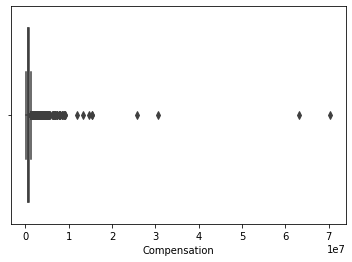

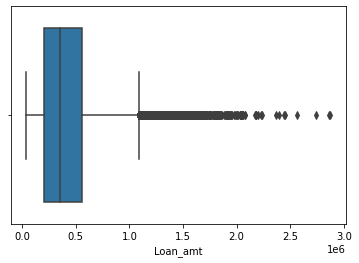

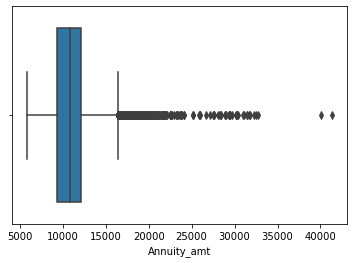

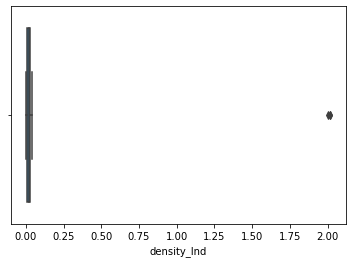

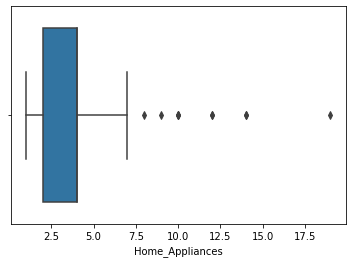

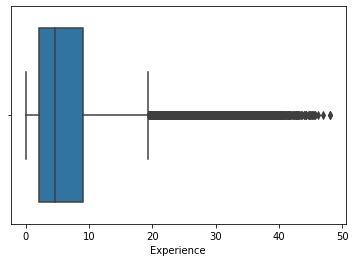

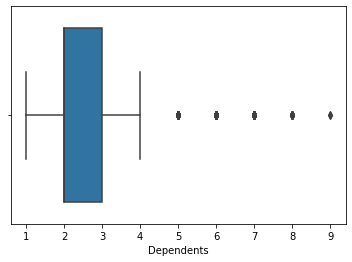

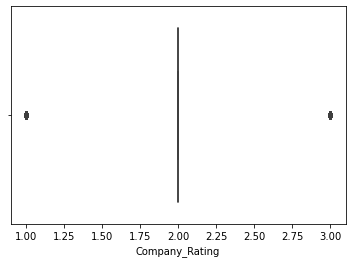

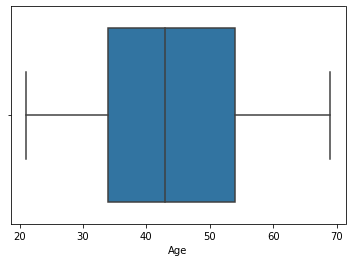

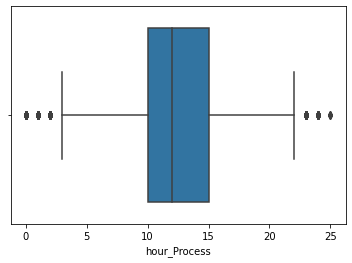

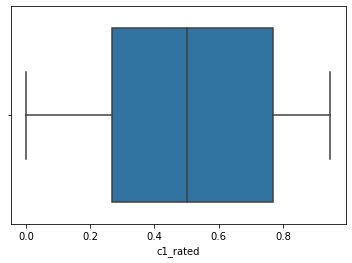

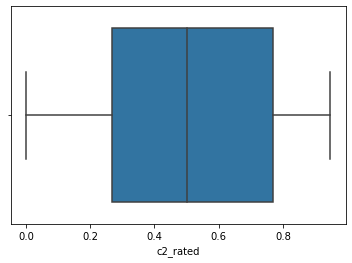

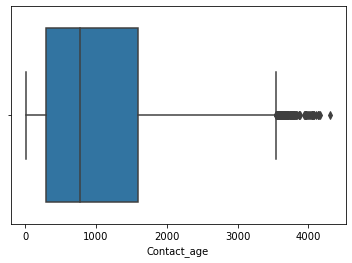

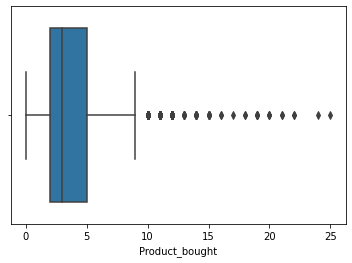

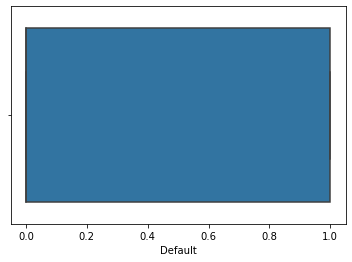

In [13]:
for i in df_train.select_dtypes('number').columns:
    sns.boxplot(df_train[i])
    plt.show()

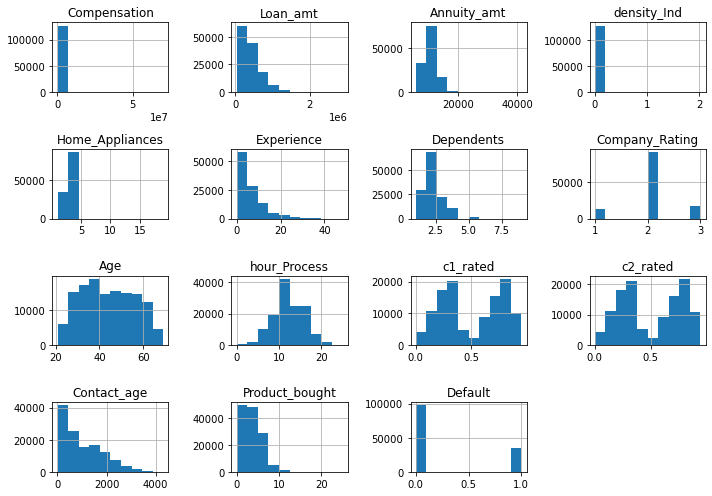

In [14]:
df_train.hist(figsize=(10,7))
plt.tight_layout()

In [15]:
## Compensation
df_train['Compensation'].describe()

count    1.261980e+05
mean     7.450519e+05
std      4.702762e+05
min      1.527280e+05
25%      5.177060e+05
50%      6.659960e+05
75%      8.794890e+05
max      7.037702e+07
Name: Compensation, dtype: float64

In [16]:
df_train['Compensation'].quantile([0.99,0.999,0.9999,0.99999])

0.99000    1.937225e+06
0.99900    3.606401e+06
0.99990    8.718894e+06
0.99999    5.457473e+07
Name: Compensation, dtype: float64

In [17]:
df_train['Compensation']=np.where(df_train['Compensation']>8.718894e+06,8.718894e+06,df_train['Compensation'])

In [18]:
## Loan Amount
df_train['Loan_amt'].describe()

count    1.324400e+05
mean     4.148011e+05
std      2.746788e+05
min      3.427500e+04
25%      2.045300e+05
50%      3.495425e+05
75%      5.582050e+05
max      2.872142e+06
Name: Loan_amt, dtype: float64

In [19]:
df_train['Loan_amt'].quantile([0.99,0.999,0.9999,0.99999])

0.99000    1.290448e+06
0.99900    1.780150e+06
0.99990    2.174838e+06
0.99999    2.822077e+06
Name: Loan_amt, dtype: float64

In [20]:
df_train['Loan_amt']=np.where(df_train['Loan_amt']>2.174838e+06,2.174838e+06,df_train['Loan_amt'])

In [21]:
## Annuity Amount
df_train['Annuity_amt'].describe()

count    127829.000000
mean      10845.286442
std        2061.529355
min        5852.100000
25%        9348.370000
50%       10773.820000
75%       12165.390000
max       41301.000000
Name: Annuity_amt, dtype: float64

<AxesSubplot:xlabel='Annuity_amt', ylabel='Density'>

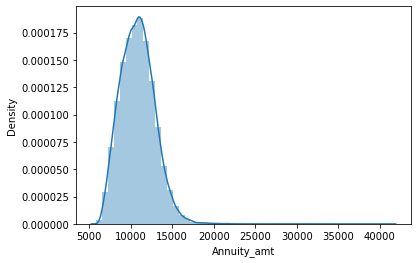

In [22]:
sns.distplot(df_train['Annuity_amt'])

In [23]:
df_train['Annuity_amt'].quantile([0.99,0.999,0.9999,0.99999])

0.99000    16105.049600
0.99900    20045.897720
0.99990    30185.256288
0.99999    37994.436606
Name: Annuity_amt, dtype: float64

In [24]:
df_train['Annuity_amt']=np.where(df_train['Annuity_amt']>30185.256288,30185.256288,df_train['Annuity_amt'])

<AxesSubplot:xlabel='density_Ind', ylabel='Density'>

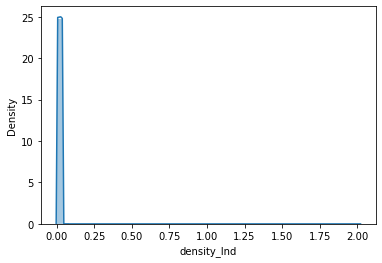

In [25]:
## Density ind
sns.distplot(df_train['density_Ind'])

In [26]:
df_train['density_Ind'].describe()

count    127024.000000
mean          0.020446
std           0.015077
min           0.000100
25%           0.010400
50%           0.020400
75%           0.030400
max           2.017800
Name: density_Ind, dtype: float64

In [27]:
## Home Appliances
df_train['Home_Appliances'].describe()

count    121476.000000
mean          3.220891
std           1.241751
min           1.000000
25%           2.000000
50%           4.000000
75%           4.000000
max          19.000000
Name: Home_Appliances, dtype: float64

In [28]:
df_train['Home_Appliances'].quantile([0.99,0.999,0.9999,0.99999])

0.99000     4.0
0.99900     4.0
0.99990     6.0
0.99999    14.0
Name: Home_Appliances, dtype: float64

In [29]:
df_train['Home_Appliances']=np.where(df_train['Home_Appliances']>14,14,df_train['Home_Appliances'])

In [30]:
## Experience
df_train['Experience'].describe()

count    110595.000000
mean          6.580616
std           6.357054
min           0.000000
25%           2.100000
50%           4.600000
75%           9.000000
max          48.100000
Name: Experience, dtype: float64

In [31]:
df_train['Experience'].quantile([0.99,0.999,0.9999,0.99999])

0.99000    30.90000
0.99900    39.70000
0.99990    44.89406
0.99999    47.89406
Name: Experience, dtype: float64

In [32]:
df_train['Experience']=np.where(df_train['Experience']>44.89406,44.89406,df_train['Experience'])

In [33]:
## Contact Age
df_train['Contact_age'].describe()

count    124287.000000
mean        979.451383
std         829.632194
min          10.000000
25%         288.000000
50%         770.000000
75%        1589.000000
max        4309.000000
Name: Contact_age, dtype: float64

In [34]:
df_train['Contact_age'].quantile([0.99,0.999,0.9999,0.99999])

0.99000    3162.00000
0.99900    3608.14200
0.99990    4040.99980
0.99999    4160.87138
Name: Contact_age, dtype: float64

In [35]:
df_train['Contact_age']=np.where(df_train['Contact_age']>4040.99980,4040.99980,df_train['Contact_age'])

In [36]:
## Contact Age
df_train['Product_bought'].describe()

count    132440.000000
mean          3.387738
std           2.173246
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max          25.000000
Name: Product_bought, dtype: float64

In [37]:
df_train['Product_bought'].quantile([0.99,0.999,0.9999,0.99999])

0.99000    10.00000
0.99900    12.00000
0.99990    18.75610
0.99999    23.35122
Name: Product_bought, dtype: float64

In [38]:
df_train['Product_bought']=np.where(df_train['Product_bought']>12,12,df_train['Product_bought'])

Null Values

In [39]:
## Null values treatment for numeric values
for i in df_train.select_dtypes('number').columns:
    df_train[i].fillna(df_train[i].median(),inplace=True)

In [40]:
## Null values treatment for categorical values
for i in df_train.select_dtypes('object').columns:
    df_train[i].fillna(df_train[i].mode()[0],inplace=True)

In [41]:
df_train.isnull().sum()

Compensation          0
Vehicle_Status        0
Loan_amt              0
Annuity_amt           0
density_Ind           0
Job_Type              0
Default_hist          0
Prop_List             0
Home_Appliances       0
Region_Type           0
Credit_Inq            0
Education_det         0
Marital_Stat          0
Gen                   0
Credit_Lnks           0
Experience            0
Income_Alt            0
Day_Process           0
Ph.No                 0
Type_Loan             0
Dependents            0
Company_Rating        0
Region                0
Age                   0
hour_Process          0
Addr_permanent        0
Permanent_Addr_tag    0
c1_rated              0
c2_rated              0
Contact_age           0
Product_bought        0
Default               0
dtype: int64

In [42]:
## aranging numerical columns
dftr_num=df_train.drop('Default',axis=1).select_dtypes('number')
dftr_num.columns

Index(['Compensation', 'Loan_amt', 'Annuity_amt', 'density_Ind',
       'Home_Appliances', 'Experience', 'Dependents', 'Company_Rating', 'Age',
       'hour_Process', 'c1_rated', 'c2_rated', 'Contact_age',
       'Product_bought'],
      dtype='object')

In [43]:
## Aranging Categorical columns
dftr_cat=df_train.select_dtypes('object')
dftr_cat.columns

Index(['Vehicle_Status', 'Job_Type', 'Default_hist', 'Prop_List',
       'Region_Type', 'Credit_Inq', 'Education_det', 'Marital_Stat', 'Gen',
       'Credit_Lnks', 'Income_Alt', 'Day_Process', 'Ph.No', 'Type_Loan',
       'Region', 'Addr_permanent', 'Permanent_Addr_tag'],
      dtype='object')

# Exploratory Data Analysis

## Univariate Analysis

<AxesSubplot:xlabel='Default', ylabel='count'>

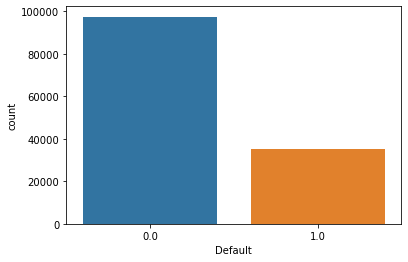

In [158]:
sns.countplot(df_train['Default'])

Vehicle_Status


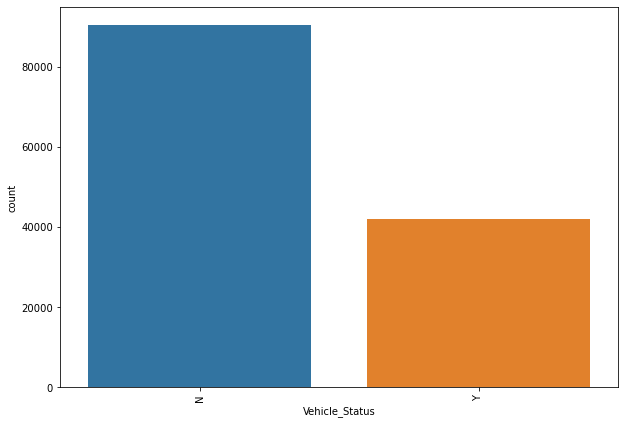

Job_Type


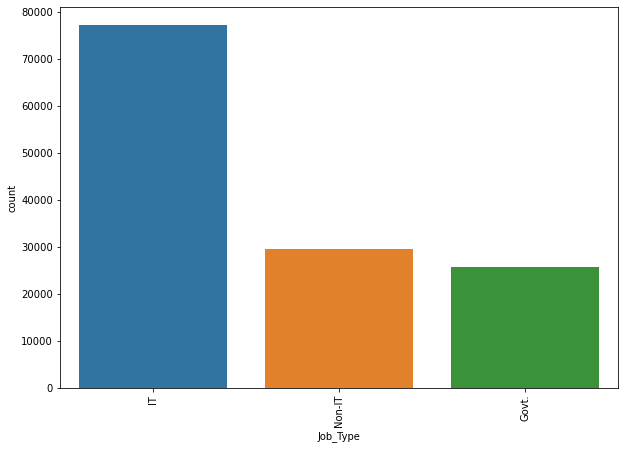

Default_hist


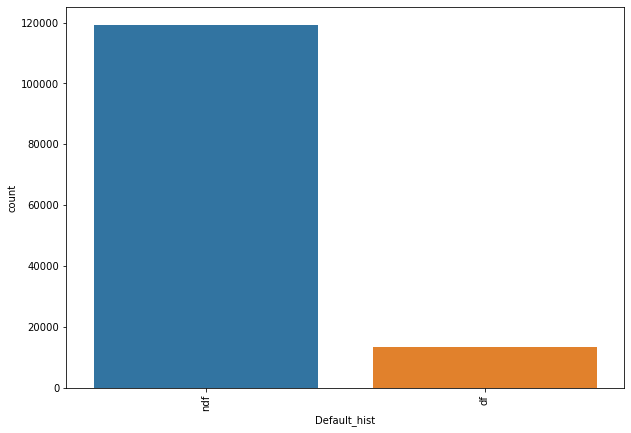

Prop_List


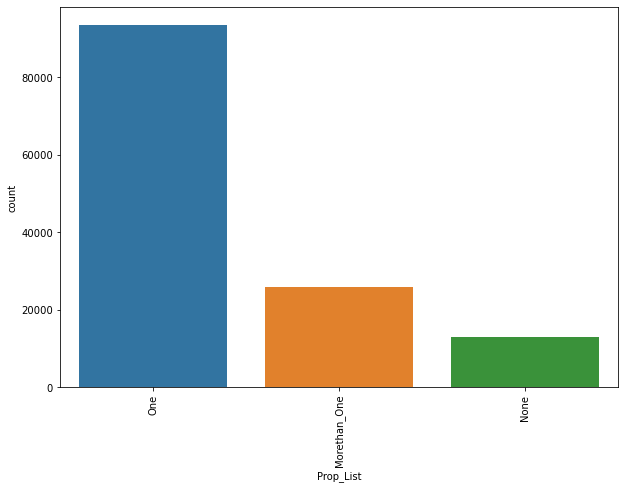

Region_Type


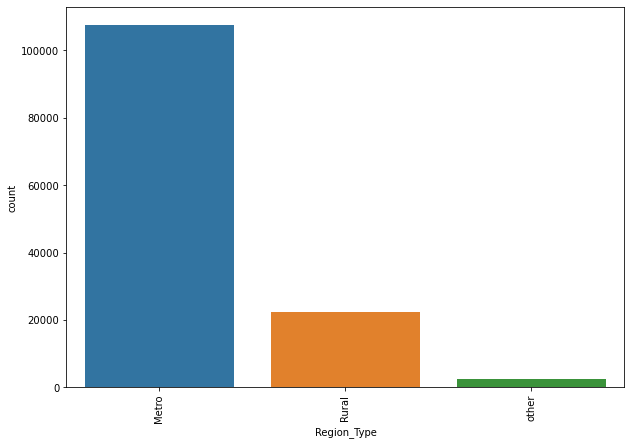

Credit_Inq


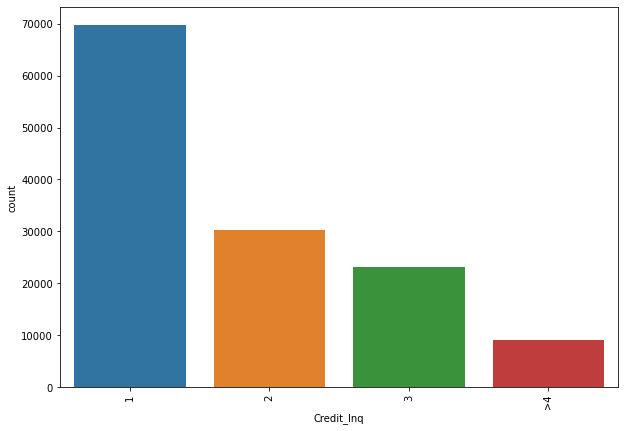

Education_det


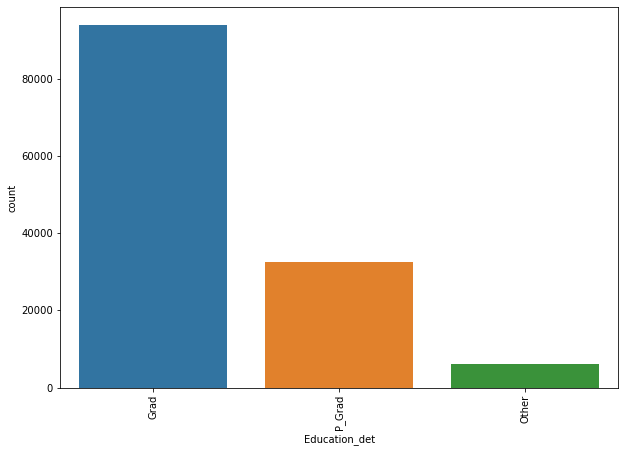

Marital_Stat


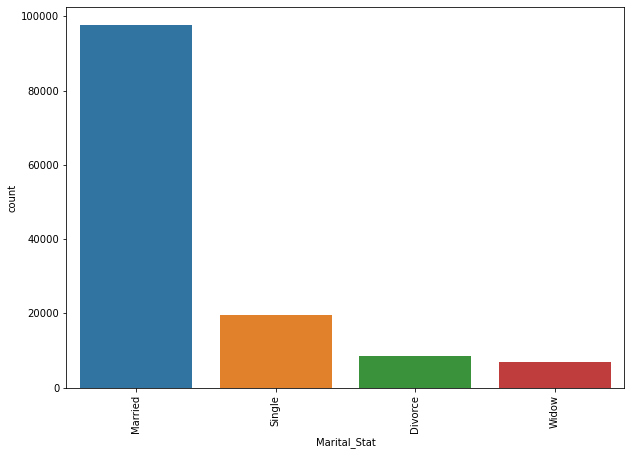

Gen


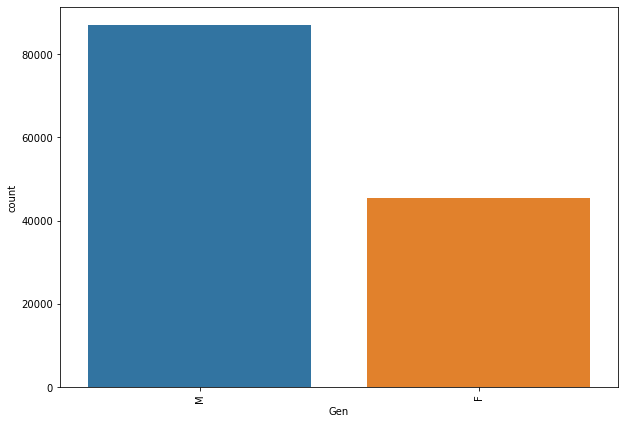

Credit_Lnks


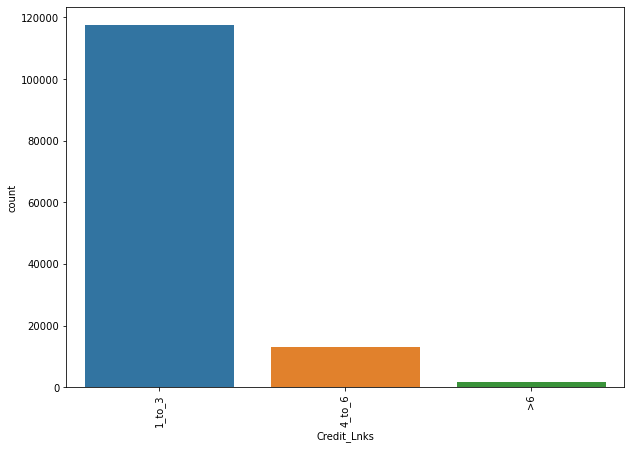

Income_Alt


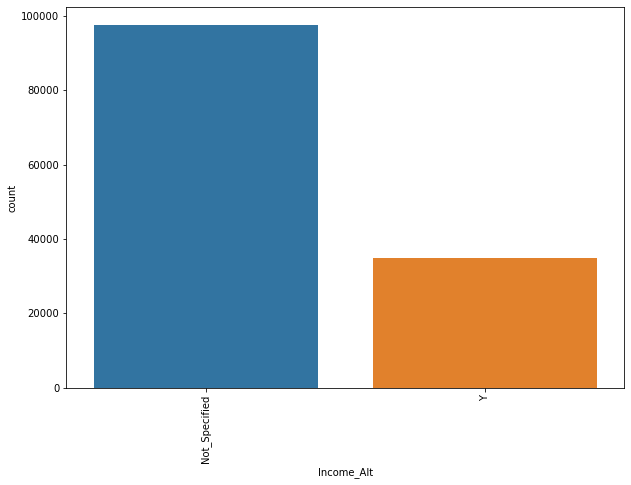

Day_Process


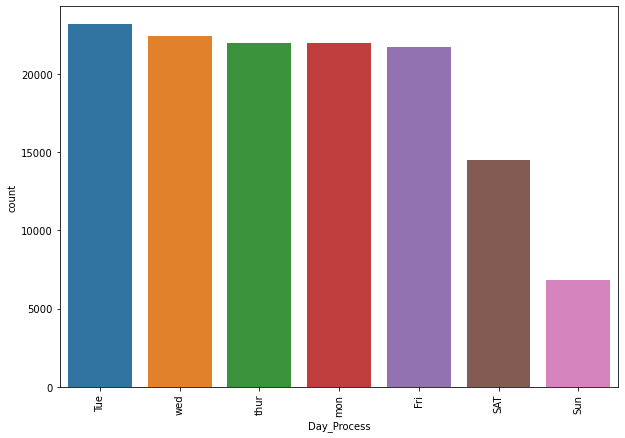

Ph.No


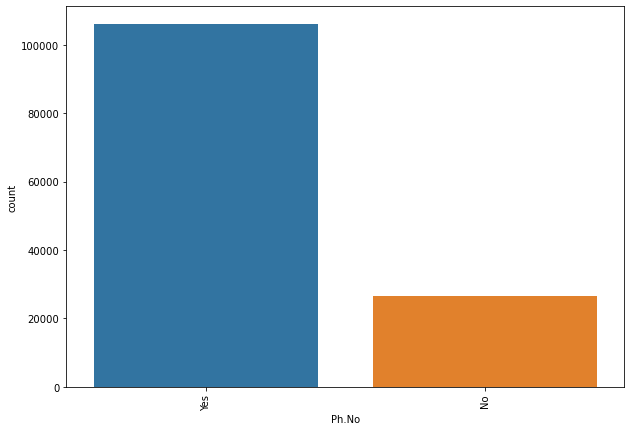

Type_Loan


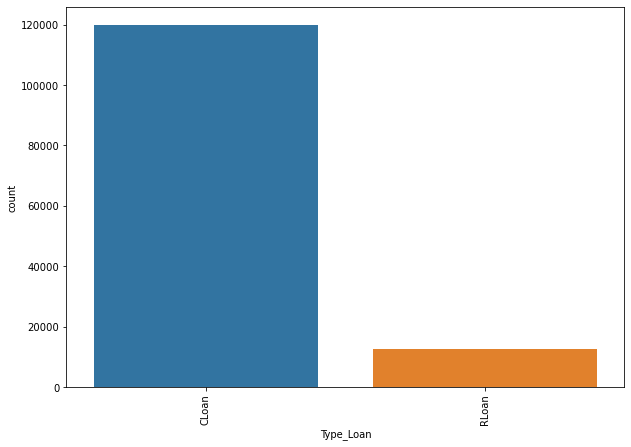

Region


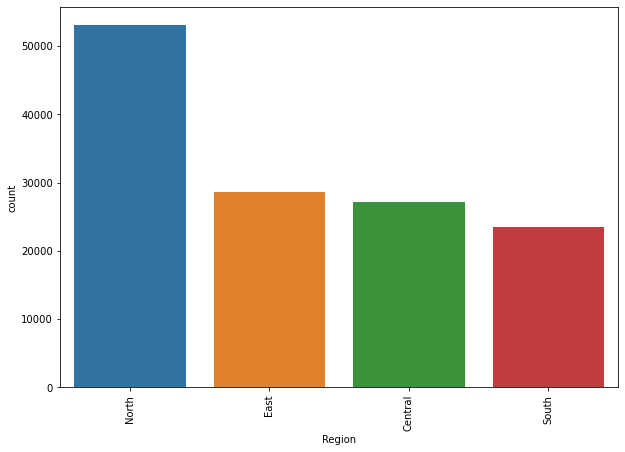

Addr_permanent


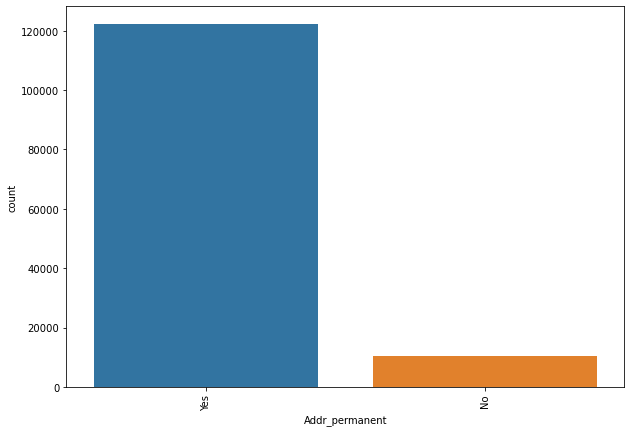

Permanent_Addr_tag


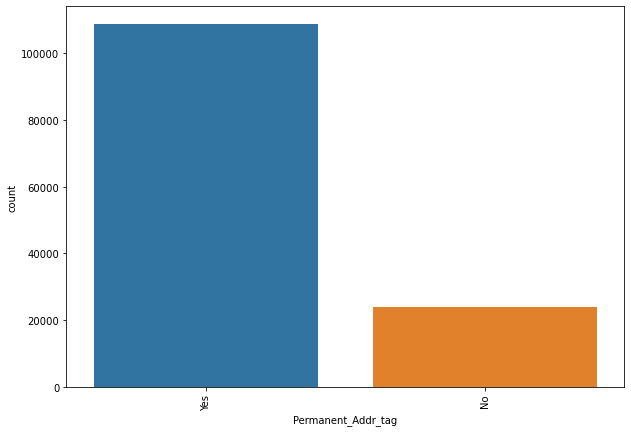

In [159]:
for j in dftr_cat.columns:
    print(j)
    plt.figure(figsize=(10,7))
    sns.countplot(dftr_cat[j],order=dftr_cat[j].value_counts().index)
    plt.xticks(rotation=90)
    plt.show()

## BiVariate Analysis

In [203]:
df_train.select_dtypes('number').columns

Index(['Compensation', 'Loan_amt', 'Annuity_amt', 'density_Ind',
       'Home_Appliances', 'Experience', 'Dependents', 'Company_Rating',
       'hour_Process', 'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought',
       'Default'],
      dtype='object')

In [204]:
df_train.select_dtypes('object').columns

Index(['Vehicle_Status', 'Job_Type', 'Default_hist', 'Prop_List',
       'Region_Type', 'Credit_Inq', 'Education_det', 'Marital_Stat', 'Gen',
       'Credit_Lnks', 'Income_Alt', 'Day_Process', 'Ph.No', 'Type_Loan',
       'Region', 'Age', 'Addr_permanent', 'Permanent_Addr_tag'],
      dtype='object')

<AxesSubplot:xlabel='Loan_amt', ylabel='Compensation'>

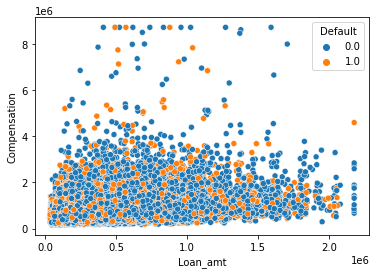

In [181]:
sns.scatterplot(df_train['Loan_amt'],df_train['Compensation'],hue=df_train['Default'])

Customers having higher compensation are less likely to default.

<AxesSubplot:xlabel='Vehicle_Status', ylabel='Loan_amt'>

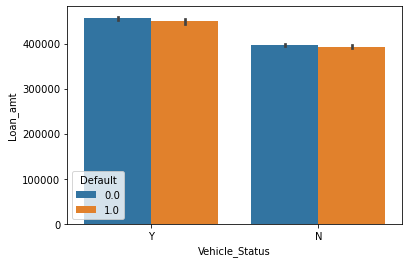

In [184]:
sns.barplot(df_train['Vehicle_Status'],df_train['Loan_amt'],hue=df_train['Default'])

Customers who own a vehicle currently are more likely to default compared to customers who do not own vehicle currently

<AxesSubplot:xlabel='Experience', ylabel='Loan_amt'>

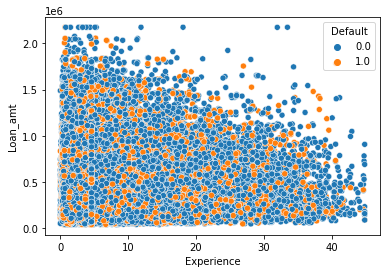

In [202]:
sns.scatterplot(df_train['Experience'],df_train['Loan_amt'],hue=df_train['Default'])

Cutomers having less experience have taken higher loan amount are more likely to default

<AxesSubplot:xlabel='Job_Type', ylabel='Dependents'>

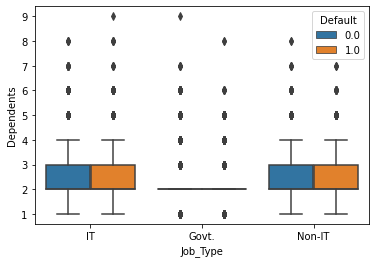

In [222]:
sns.boxplot(df_train['Job_Type'],df_train['Dependents'],hue=df_train['Default'])

Cutomers working in the IT and Non IT companies have more number of dependents are more likely to default.

<AxesSubplot:xlabel='Job_Type', ylabel='c1_rated'>

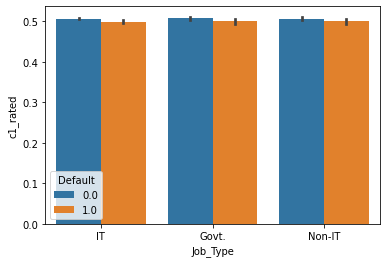

In [223]:
sns.barplot(df_train['Job_Type'],df_train['c1_rated'],hue=df_train['Default'])

<AxesSubplot:xlabel='Loan_amt', ylabel='c1_rated'>

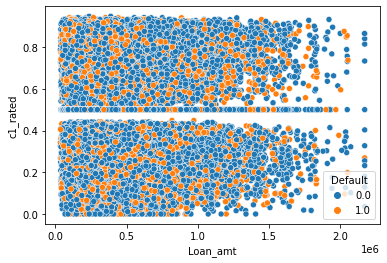

In [227]:
sns.scatterplot(df_train['Loan_amt'],df_train['c1_rated'],hue=df_train['Default'])

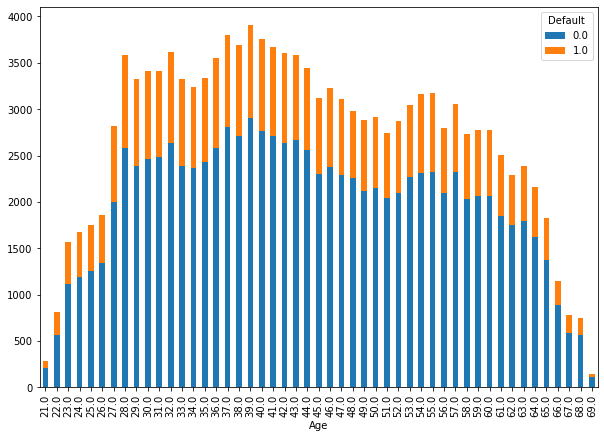

In [201]:
pd.crosstab(df_train['Age'],df_train['Default']).plot(kind='bar',stacked=True,figsize=(10,7))
plt.show()

Most of the customers who are in middle age bracket are more likely to default.

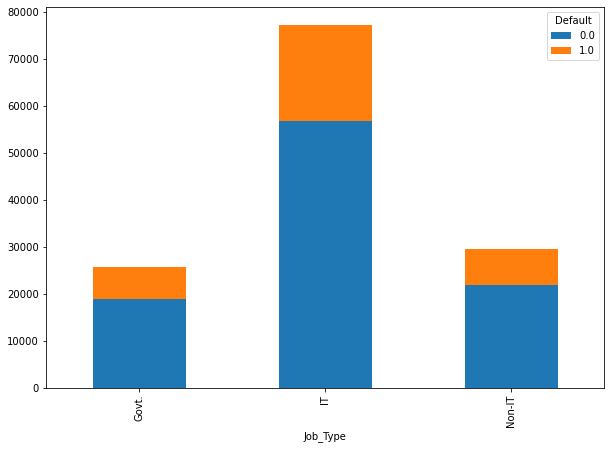

In [206]:
pd.crosstab(df_train['Job_Type'],df_train['Default']).plot(kind='bar',stacked=True,figsize=(10,7))
plt.show()

Customers who are IT professionals more likely to default

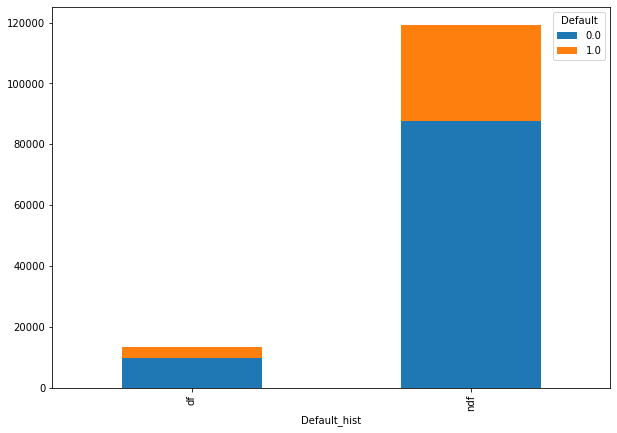

In [207]:
pd.crosstab(df_train['Default_hist'],df_train['Default']).plot(kind='bar',stacked=True,figsize=(10,7))
plt.show()

Customers who do not have a default history are more likely to default.

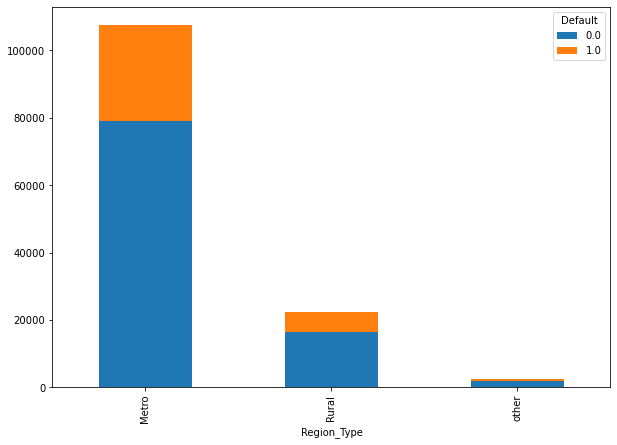

In [208]:
pd.crosstab(df_train['Region_Type'],df_train['Default']).plot(kind='bar',stacked=True,figsize=(10,7))
plt.show()

Customers residing in Metro cities are more likely to default.

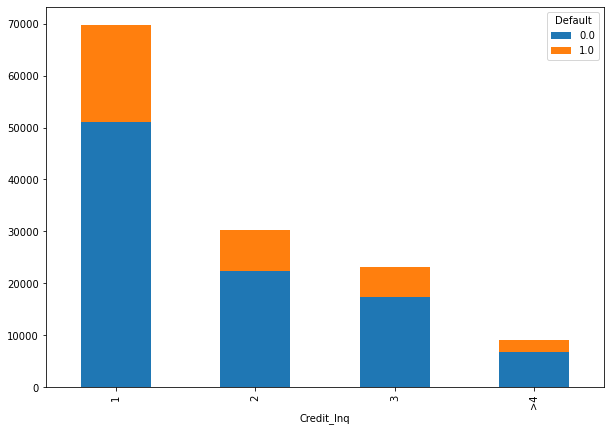

In [209]:
pd.crosstab(df_train['Credit_Inq'],df_train['Default']).plot(kind='bar',stacked=True,figsize=(10,7))
plt.show()

Customers who have made credit inquiry only once are more likely to default.


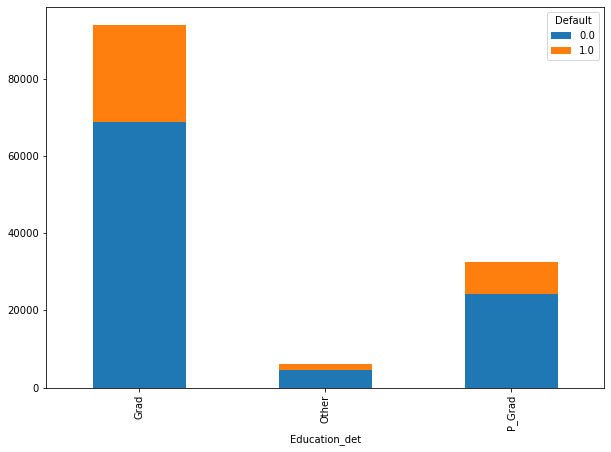

In [210]:
pd.crosstab(df_train['Education_det'],df_train['Default']).plot(kind='bar',stacked=True,figsize=(10,7))
plt.show()

Graduates are more likely default compared to post graduates.

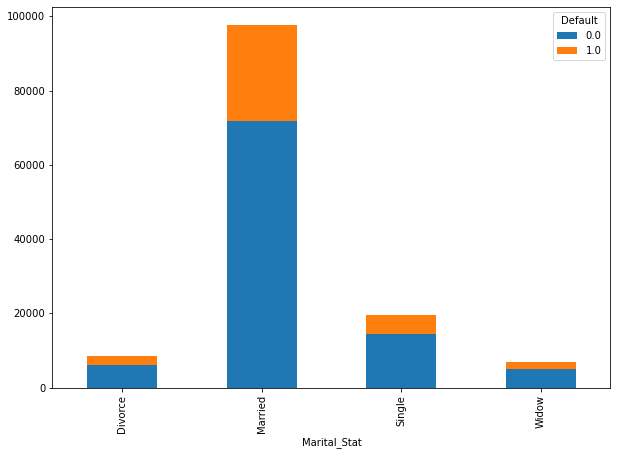

In [211]:
pd.crosstab(df_train['Marital_Stat'],df_train['Default']).plot(kind='bar',stacked=True,figsize=(10,7))
plt.show()

Married Customers are more lilkely to default.

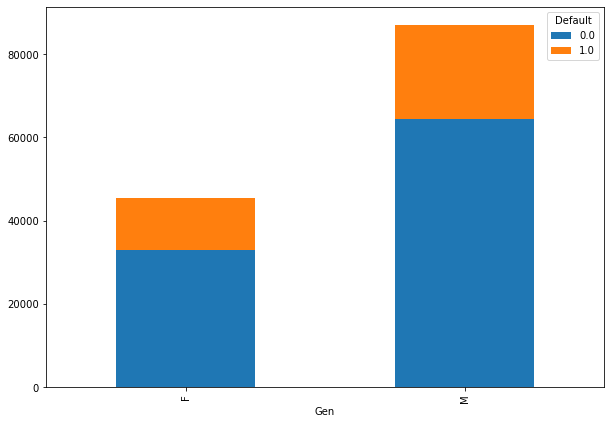

In [212]:
pd.crosstab(df_train['Gen'],df_train['Default']).plot(kind='bar',stacked=True,figsize=(10,7))
plt.show()

Male Customers are more likely to default.m

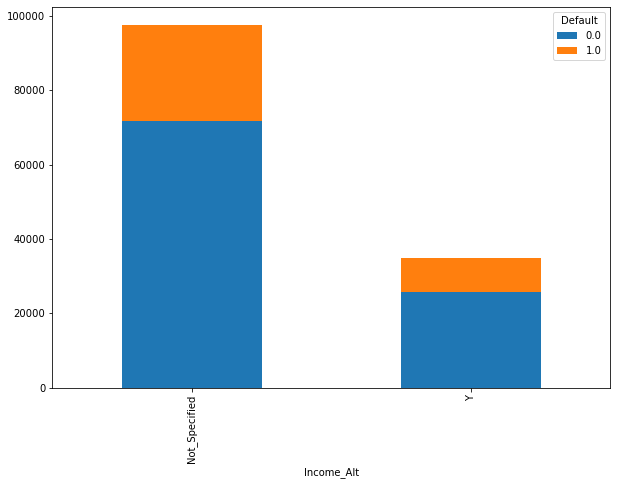

In [213]:
pd.crosstab(df_train['Income_Alt'],df_train['Default']).plot(kind='bar',stacked=True,figsize=(10,7))
plt.show()

Customers whose alternate income is not specified are more likely to default.

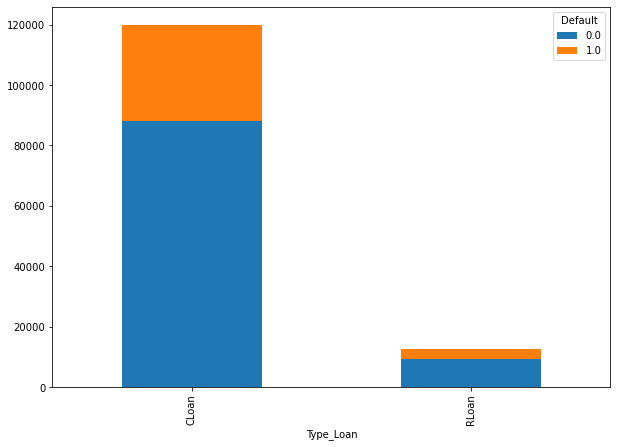

In [214]:
pd.crosstab(df_train['Type_Loan'],df_train['Default']).plot(kind='bar',stacked=True,figsize=(10,7))
plt.show()

Customers who have CLoan Type are more likely to default.

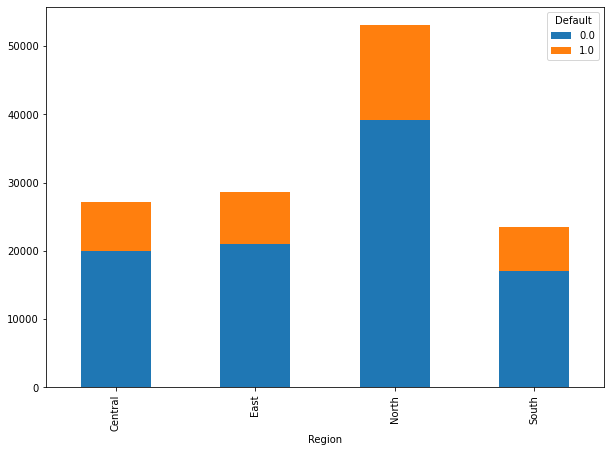

In [215]:
pd.crosstab(df_train['Region'],df_train['Default']).plot(kind='bar',stacked=True,figsize=(10,7))
plt.show()

Customers  who belong to Northern Region are more likely to defualt.

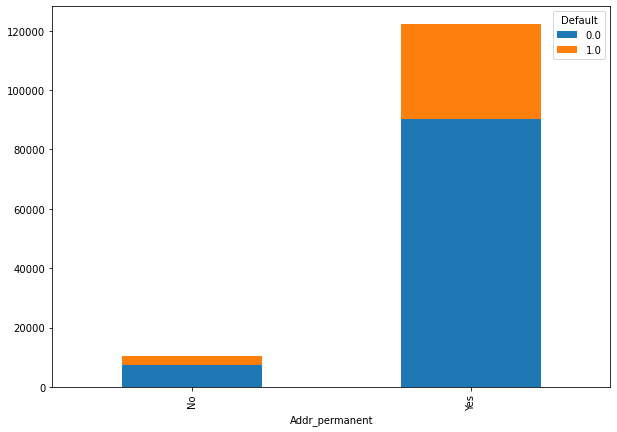

In [216]:
pd.crosstab(df_train['Addr_permanent'],df_train['Default']).plot(kind='bar',stacked=True,figsize=(10,7))
plt.show()

Customers having permanent address are more likely to default.

## Multivariate Analysis

<AxesSubplot:>

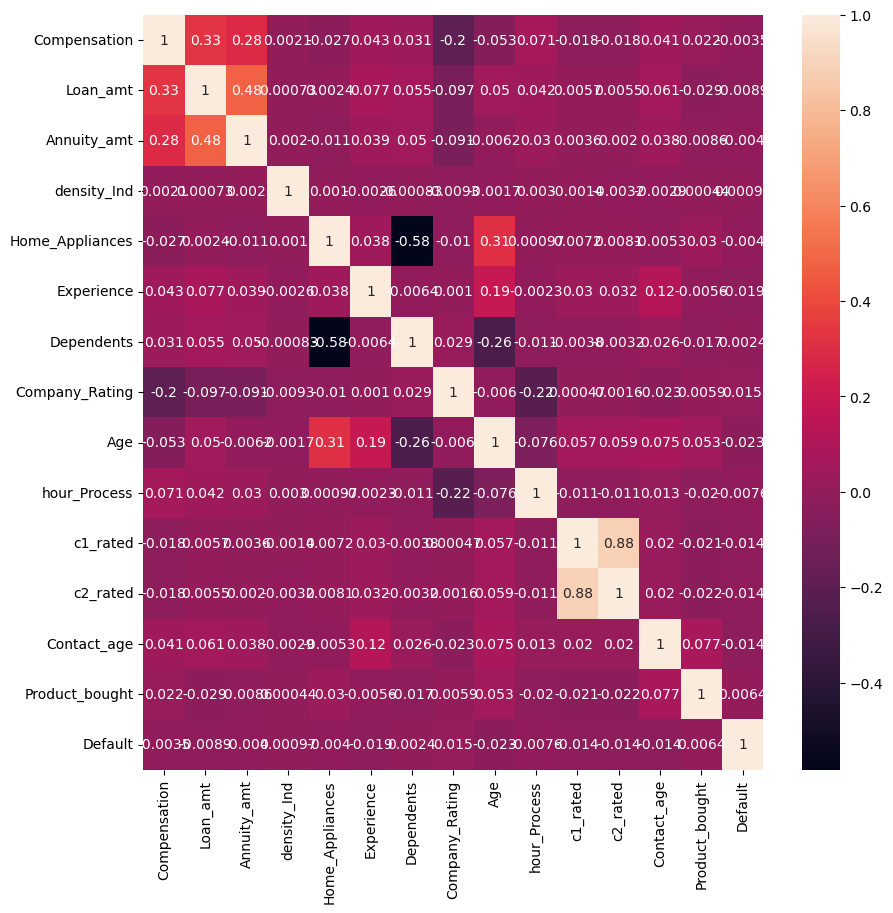

In [177]:
## Heat map
plt.figure(figsize=(10,10),dpi=100)
sns.heatmap(df_train.corr(),annot=True)

Compensation,Loan_Amount,Annuity amount have positive correlation with Default.

### Feature Engineering-Train Data

### Scaling the Data

In [44]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler()
df_nums=x.fit_transform(dftr_num)
df_scaled=pd.DataFrame(df_nums,columns=dftr_num.columns)
df_scaled.head(2)

,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought
0,0.171074,0.886248,1.470574,0.674271,0.591573,-0.914436,0.929036,-0.057893,0.172766,-0.577807,-1.710671,-1.681619,-1.177979,-0.640337
1,0.398700,-0.789469,0.163440,-0.070728,-1.891774,-0.555755,0.929036,-2.136900,0.172766,-0.017065,-1.283147,-1.261763,-0.820320,0.283524


### Encoding the Data

In [45]:
df_encode=pd.get_dummies(dftr_cat,drop_first=True)
df_encode.head(1)

,Vehicle_Status_Y,Job_Type_IT,Job_Type_Non-IT,Default_hist_ndf,Prop_List_None,Prop_List_One,Region_Type_Rural,Region_Type_other,Credit_Inq_2,Credit_Inq_3,Credit_Inq_>4,Education_det_Other,Education_det_P_Grad,Marital_Stat_Married,Marital_Stat_Single,Marital_Stat_Widow,Gen_M,Credit_Lnks_4_to_6,Credit_Lnks_>6,Income_Alt_Y,Day_Process_SAT,Day_Process_Sun,Day_Process_Tue,Day_Process_mon,Day_Process_thur,Day_Process_wed,Ph.No_Yes,Type_Loan_RLoan,Region_East,Region_North,Region_South,Addr_permanent_Yes,Permanent_Addr_tag_Yes
0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0


In [46]:
train_new=pd.concat([df_scaled,df_encode],axis=1)
train_new.head(1)

,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Vehicle_Status_Y,Job_Type_IT,Job_Type_Non-IT,Default_hist_ndf,Prop_List_None,Prop_List_One,Region_Type_Rural,Region_Type_other,Credit_Inq_2,Credit_Inq_3,Credit_Inq_>4,Education_det_Other,Education_det_P_Grad,Marital_Stat_Married,Marital_Stat_Single,Marital_Stat_Widow,Gen_M,Credit_Lnks_4_to_6,Credit_Lnks_>6,Income_Alt_Y,Day_Process_SAT,Day_Process_Sun,Day_Process_Tue,Day_Process_mon,Day_Process_thur,Day_Process_wed,Ph.No_Yes,Type_Loan_RLoan,Region_East,Region_North,Region_South,Addr_permanent_Yes,Permanent_Addr_tag_Yes
0,0.171074,0.886248,1.470574,0.674271,0.591573,-0.914436,0.929036,-0.057893,0.172766,-0.577807,-1.710671,-1.681619,-1.177979,-0.640337,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0


In [47]:
xtrain=train_new
ytrain=df_train['Default']

In [48]:
xtrain.shape

(132440, 47)

## Undersampling

In [49]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
xtrain1u,ytrain1u=undersample.fit_resample(xtrain,ytrain)

In [50]:
ytrain1u.value_counts()

0.0    35004
1.0    35004
Name: Default, dtype: int64

## Smote Analysis

In [51]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
xtrain1,ytrain1=oversample.fit_resample(xtrain,ytrain)

In [52]:
ytrain1.value_counts()

1.0    97436
0.0    97436
Name: Default, dtype: int64

## Test Data

In [53]:
df_test=pd.read_csv('Test_Set_TVS.csv')
df_test.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
0,487410,653106.0,Y,809400.00,9145.51,0.0015,Govt.,ndf,Morethan_One,1.0,Metro,1,Grad,Married,M,1_to_3,5.4,Not_Specified,thur,Yes,CLoan,3.0,2.0,North,39.0,11.0,Yes,Yes,0.349,0.349,3133.0,2.0
1,533258,434150.0,N,72618.75,7683.23,0.0332,Govt.,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,2.3,Y,wed,No,CLoan,2.0,3.0,Central,46.0,13.0,Yes,Yes,0.237,0.237,1730.0,5.0
2,581926,489060.0,N,267255.80,9032.85,0.0316,IT,ndf,Morethan_One,NaN,Rural,1,Grad,Married,M,1_to_3,11.0,Y,thur,No,CLoan,3.0,2.0,South,33.0,15.0,Yes,Yes,0.111,0.111,759.0,4.0
3,486301,957294.0,N,623600.00,12838.25,0.0320,IT,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,9.7,Y,Tue,Yes,CLoan,2.0,2.0,East,48.0,12.0,Yes,Yes,0.323,0.323,609.0,4.0
4,580822,1333739.0,N,529520.00,11799.09,0.0073,Non-IT,ndf,One,4.0,Metro,3,P_Grad,Married,F,1_to_3,NaN,Y,wed,Yes,RLoan,2.0,3.0,North,53.0,7.0,Yes,Yes,0.940,0.940,1222.0,1.0


In [54]:
df_test.shape

(56760, 32)

In [55]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56760 entries, 0 to 56759
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  56760 non-null  int64  
 1   Compensation        54010 non-null  float64
 2   Vehicle_Status      52877 non-null  object 
 3   Loan_amt            56760 non-null  float64
 4   Annuity_amt         54797 non-null  float64
 5   density_Ind         54485 non-null  float64
 6   Job_Type            52440 non-null  object 
 7   Default_hist        56760 non-null  object 
 8   Prop_List           55849 non-null  object 
 9   Home_Appliances     52001 non-null  float64
 10  Region_Type         56760 non-null  object 
 11  Credit_Inq          55594 non-null  object 
 12  Education_det       56760 non-null  object 
 13  Marital_Stat        56760 non-null  object 
 14  Gen                 56760 non-null  object 
 15  Credit_Lnks         56760 non-null  object 
 16  Expe

In [56]:
df_test.describe()

,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought
count,56760.000000,5.401000e+04,5.676000e+04,54797.000000,54485.000000,52001.000000,47409.000000,56760.000000,51707.000000,56760.000000,56760.000000,49397.000000,51105.000000,53238.00000,56760.000000
mean,489156.967089,7.423110e+05,4.145631e+05,10832.334840,0.020465,3.220688,6.590278,2.150828,2.028487,43.944327,12.079299,0.505408,0.506154,971.82118,3.399683
std,58459.598434,3.764809e+05,2.759849e+05,2060.269444,0.016790,1.240932,6.284459,0.909028,0.505052,11.979557,3.554178,0.268413,0.268316,825.51022,2.174527
min,387653.000000,1.483300e+05,3.477750e+04,6061.610000,0.000000,1.000000,0.000000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,10.00000,0.000000
25%,438878.000000,5.162055e+05,2.035587e+05,9344.360000,0.010400,2.000000,2.200000,2.000000,2.000000,34.000000,10.000000,0.268000,0.269000,284.00000,2.000000
50%,488939.500000,6.667440e+05,3.488628e+05,10756.450000,0.020300,4.000000,4.600000,2.000000,2.000000,43.000000,12.000000,0.431000,0.500000,767.00000,3.000000
75%,539700.500000,8.770300e+05,5.598608e+05,12142.340000,0.030500,4.000000,9.000000,3.000000,2.000000,54.000000,15.000000,0.769000,0.769000,1579.00000,5.000000
max,590401.000000,1.727617e+07,2.743640e+06,38116.000000,2.037200,19.000000,48.100000,9.000000,3.000000,69.000000,25.000000,0.941000,0.941000,4109.00000,26.000000


In [57]:
# Insignificant variable for further analysis
df_test.drop('ID',axis=1,inplace=True)

In [58]:
df_test.isnull().sum()

Compensation          2750
Vehicle_Status        3883
Loan_amt                 0
Annuity_amt           1963
density_Ind           2275
Job_Type              4320
Default_hist             0
Prop_List              911
Home_Appliances       4759
Region_Type              0
Credit_Inq            1166
Education_det            0
Marital_Stat             0
Gen                      0
Credit_Lnks              0
Experience            9351
Income_Alt            3299
Day_Process              0
Ph.No                    0
Type_Loan                0
Dependents               0
Company_Rating        5053
Region                   0
Age                      0
hour_Process             0
Addr_permanent           0
Permanent_Addr_tag       0
c1_rated              7363
c2_rated              5655
Contact_age           3522
Product_bought           0
dtype: int64

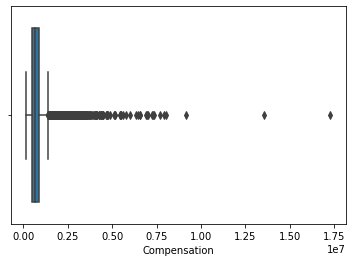

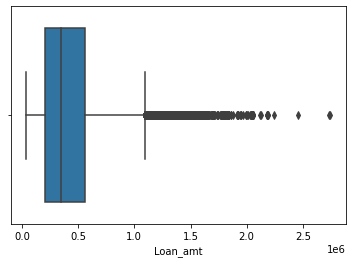

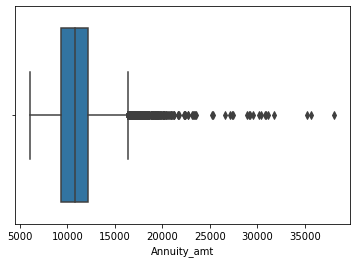

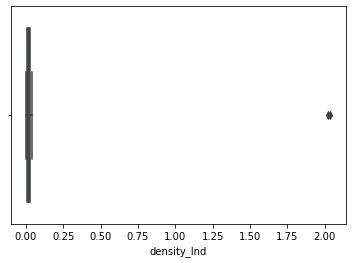

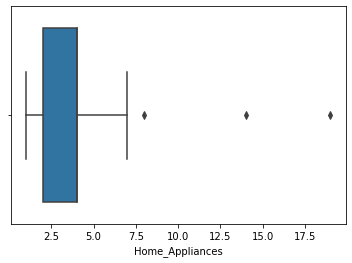

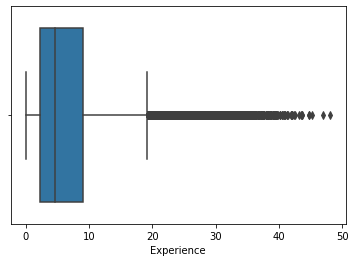

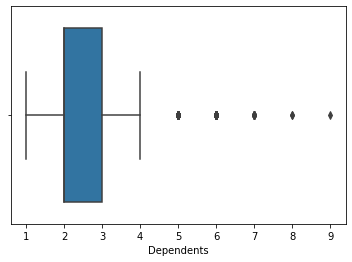

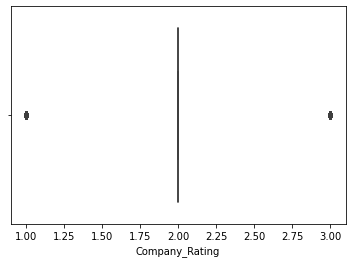

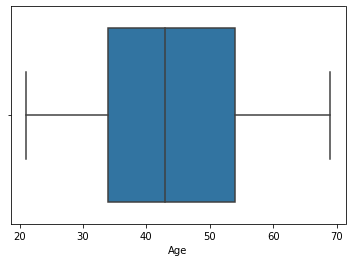

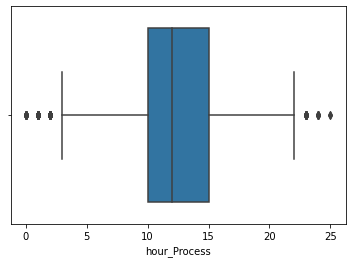

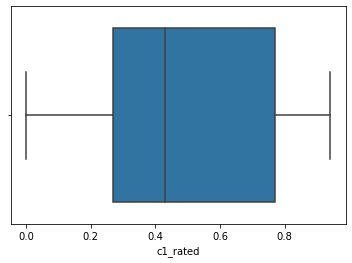

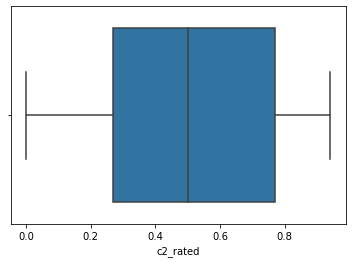

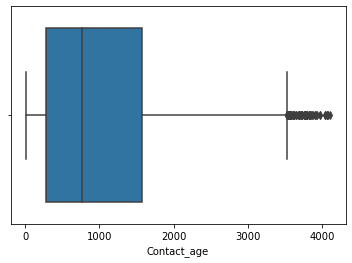

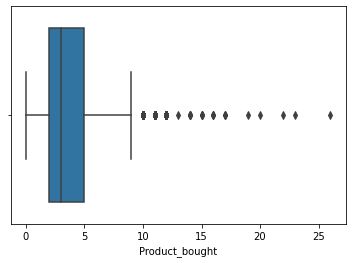

In [59]:
## Outliers Treatment
for i in df_test.select_dtypes('number').columns:
    sns.boxplot(df_test[i])
    plt.show()

In [60]:
df_test.describe()

,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought
count,5.401000e+04,5.676000e+04,54797.000000,54485.000000,52001.000000,47409.000000,56760.000000,51707.000000,56760.000000,56760.000000,49397.000000,51105.000000,53238.00000,56760.000000
mean,7.423110e+05,4.145631e+05,10832.334840,0.020465,3.220688,6.590278,2.150828,2.028487,43.944327,12.079299,0.505408,0.506154,971.82118,3.399683
std,3.764809e+05,2.759849e+05,2060.269444,0.016790,1.240932,6.284459,0.909028,0.505052,11.979557,3.554178,0.268413,0.268316,825.51022,2.174527
min,1.483300e+05,3.477750e+04,6061.610000,0.000000,1.000000,0.000000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,10.00000,0.000000
25%,5.162055e+05,2.035587e+05,9344.360000,0.010400,2.000000,2.200000,2.000000,2.000000,34.000000,10.000000,0.268000,0.269000,284.00000,2.000000
50%,6.667440e+05,3.488628e+05,10756.450000,0.020300,4.000000,4.600000,2.000000,2.000000,43.000000,12.000000,0.431000,0.500000,767.00000,3.000000
75%,8.770300e+05,5.598608e+05,12142.340000,0.030500,4.000000,9.000000,3.000000,2.000000,54.000000,15.000000,0.769000,0.769000,1579.00000,5.000000
max,1.727617e+07,2.743640e+06,38116.000000,2.037200,19.000000,48.100000,9.000000,3.000000,69.000000,25.000000,0.941000,0.941000,4109.00000,26.000000


In [61]:
df_test.quantile([0.99,0.999,0.9999])

,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought
0.9900,1.925902e+06,1.287590e+06,16174.859200,0.0400,4.0,30.50000,5.0,3.0,67.0,20.0,0.910,0.910,3157.630,10.0
0.9990,3.889383e+06,1.809473e+06,20012.788400,0.0407,4.0,39.00000,6.0,3.0,69.0,22.0,0.932,0.932,3598.208,12.0
0.9999,7.545303e+06,2.182615e+06,30885.192636,0.0413,5.8,43.98512,7.0,3.0,69.0,24.0,0.940,0.940,4032.000,17.0


In [62]:
## compensation
df_test['Compensation']=np.where(df_test['Compensation']>8.718894e+06,8.718894e+06,df_test['Compensation'])

In [63]:
## Loan Amount
df_test['Loan_amt']=np.where(df_test['Loan_amt']>2.174838e+06,2.174838e+06,df_test['Loan_amt'])

In [65]:
## Annuity amount
df_test['Annuity_amt']=np.where(df_test['Annuity_amt']>30185.256288,30185.256288,df_test['Annuity_amt'])

In [66]:
## Home Appliances
df_test['Home_Appliances']=np.where(df_test['Home_Appliances']>14,14,df_test['Home_Appliances'])

In [67]:
df_test['Experience']=np.where(df_test['Experience']>44.89406,44.89406,df_test['Experience'])

In [68]:
df_test['Contact_age']=np.where(df_test['Contact_age']>4040.99980,4040.99980,df_test['Contact_age'])

In [69]:
df_test['Product_bought']=np.where(df_test['Product_bought']>12,12,df_test['Product_bought'])

In [70]:
## Null values treatment for numeric values
for i in df_test.select_dtypes('number').columns:
    df_test[i].fillna(df_test[i].median(),inplace=True)

In [71]:
## Null values treatment for categorical values
for i in df_test.select_dtypes('object').columns:
    df_test[i].fillna(df_test[i].mode()[0],inplace=True)

In [72]:
df_test.isnull().sum()

Compensation          0
Vehicle_Status        0
Loan_amt              0
Annuity_amt           0
density_Ind           0
Job_Type              0
Default_hist          0
Prop_List             0
Home_Appliances       0
Region_Type           0
Credit_Inq            0
Education_det         0
Marital_Stat          0
Gen                   0
Credit_Lnks           0
Experience            0
Income_Alt            0
Day_Process           0
Ph.No                 0
Type_Loan             0
Dependents            0
Company_Rating        0
Region                0
Age                   0
hour_Process          0
Addr_permanent        0
Permanent_Addr_tag    0
c1_rated              0
c2_rated              0
Contact_age           0
Product_bought        0
dtype: int64

In [73]:
## aranging numerical columns
dfts_num=df_test.select_dtypes('number')
dfts_num.columns

Index(['Compensation', 'Loan_amt', 'Annuity_amt', 'density_Ind',
       'Home_Appliances', 'Experience', 'Dependents', 'Company_Rating', 'Age',
       'hour_Process', 'c1_rated', 'c2_rated', 'Contact_age',
       'Product_bought'],
      dtype='object')

In [74]:
## Aranging categorical columns
dfts_cat=df_test.select_dtypes('object')
dfts_cat.columns

Index(['Vehicle_Status', 'Job_Type', 'Default_hist', 'Prop_List',
       'Region_Type', 'Credit_Inq', 'Education_det', 'Marital_Stat', 'Gen',
       'Credit_Lnks', 'Income_Alt', 'Day_Process', 'Ph.No', 'Type_Loan',
       'Region', 'Addr_permanent', 'Permanent_Addr_tag'],
      dtype='object')

## Feature Engineering-Test Data

## Scaling the Data

In [75]:
y=StandardScaler()
df_nums1=y.fit_transform(dfts_num)
df_scaled1=pd.DataFrame(df_nums1,columns=dfts_num.columns)
df_scaled1.head(2)

,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought
0,-0.236998,1.431753,-0.833562,-1.152441,-1.895044,-0.148927,0.934162,-0.053829,-0.412734,-0.303673,-0.583193,-0.614842,2.713990,-0.645798
1,-0.845342,-1.239776,-1.557460,0.774576,0.591955,-0.684331,-0.165924,2.020383,0.171600,0.259050,-1.028270,-1.054741,0.962418,0.740113


## Encoding the Data

In [76]:
df_encode1=pd.get_dummies(dfts_cat,drop_first=True)
df_encode1.head(1)

,Vehicle_Status_Y,Job_Type_IT,Job_Type_Non-IT,Default_hist_ndf,Prop_List_None,Prop_List_One,Region_Type_Rural,Region_Type_other,Credit_Inq_2,Credit_Inq_3,Credit_Inq_>4,Education_det_Other,Education_det_P_Grad,Marital_Stat_Married,Marital_Stat_Single,Marital_Stat_Widow,Gen_M,Credit_Lnks_4_to_6,Credit_Lnks_>6,Income_Alt_Y,Day_Process_SAT,Day_Process_Sun,Day_Process_Tue,Day_Process_mon,Day_Process_thur,Day_Process_wed,Ph.No_Yes,Type_Loan_RLoan,Region_East,Region_North,Region_South,Addr_permanent_Yes,Permanent_Addr_tag_Yes
0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1


In [77]:
test_new=pd.concat([df_scaled1,df_encode1],axis=1)
test_new.head(1)

,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Vehicle_Status_Y,Job_Type_IT,Job_Type_Non-IT,Default_hist_ndf,Prop_List_None,Prop_List_One,Region_Type_Rural,Region_Type_other,Credit_Inq_2,Credit_Inq_3,Credit_Inq_>4,Education_det_Other,Education_det_P_Grad,Marital_Stat_Married,Marital_Stat_Single,Marital_Stat_Widow,Gen_M,Credit_Lnks_4_to_6,Credit_Lnks_>6,Income_Alt_Y,Day_Process_SAT,Day_Process_Sun,Day_Process_Tue,Day_Process_mon,Day_Process_thur,Day_Process_wed,Ph.No_Yes,Type_Loan_RLoan,Region_East,Region_North,Region_South,Addr_permanent_Yes,Permanent_Addr_tag_Yes
0,-0.236998,1.431753,-0.833562,-1.152441,-1.895044,-0.148927,0.934162,-0.053829,-0.412734,-0.303673,-0.583193,-0.614842,2.71399,-0.645798,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1


In [78]:
test_new.shape

(56760, 47)

In [ ]:
combined_df=pd.concat([df_train,df_test])
combined_df.head()

In [ ]:
combined_df.shape

## Model Building & HyperParameter Tuning

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC,LinearSVC

In [115]:
import lightgbm as lbm

In [116]:
from lightgbm import LGBMClassifier

In [127]:
from sklearn.metrics import f1_score

## Building a Base Model

In [82]:
## Logistic Regression
lr=LogisticRegression()
lr_model=lr.fit(xtrain,ytrain)

In [83]:
lr_pred=lr_model.predict(test_new)
lr_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [84]:
## Function for fit
y_pred=0
def report(model,x_train,y_train,x_test):
    global y_pred
    y_pred=model.fit(x_train,y_train).predict(x_test)
    return y_pred

## Imbalanced Data

In [85]:
report(LogisticRegression(),xtrain,ytrain,test_new)

array([0., 0., 0., ..., 0., 0., 0.])

In [86]:
report(DecisionTreeClassifier(),xtrain,ytrain,test_new)

array([1., 0., 0., ..., 1., 0., 0.])

In [87]:
report(AdaBoostClassifier(),xtrain,ytrain,test_new)

array([0., 0., 0., ..., 0., 0., 0.])

In [88]:
report(RandomForestClassifier(),xtrain,ytrain,test_new)

array([0., 0., 0., ..., 0., 0., 0.])

In [89]:
report(GradientBoostingClassifier(),xtrain,ytrain,test_new)

array([0., 0., 0., ..., 0., 0., 0.])

In [90]:
report(XGBClassifier(),xtrain,ytrain,test_new)

[10:39:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0., 0., 0., ..., 0., 0., 0.])

In [117]:
## LightGbm 
report(LGBMClassifier(),xtrain,ytrain,test_new)

array([0., 0., 0., ..., 0., 0., 0.])

In [151]:
## Random forest 
rf=RandomForestClassifier()
rf_model=rf.fit(xtrain,ytrain)

In [152]:
rf_pred=rf_model.predict(test_new)
rf_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [118]:
dt_pred=pd.DataFrame(y_pred)
sub=pd.read_csv('Sample_Submission_TVS.csv')
data=pd.concat([sub['ID'],dt_pred],axis=1)
data.columns=['ID','Default']
data.to_csv('Sample_Submission_TVS.csv',index=False)

## Feature Importance

In [153]:
## Feature importance
## Randomforest feature importance
important_features = pd.DataFrame({'Features': xtrain.columns, 
                                   'Importance': rf_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)

In [154]:
important_features.groupby('Features')['Importance'].agg('max').sort_values(ascending=False)

Features
Loan_amt                  0.077341
Annuity_amt               0.077274
Compensation              0.076941
density_Ind               0.074639
Contact_age               0.074363
c2_rated                  0.068893
c1_rated                  0.067657
Experience                0.060958
Age                       0.058233
hour_Process              0.051713
Product_bought            0.042114
Dependents                0.016836
Company_Rating            0.013235
Job_Type_IT               0.011258
Income_Alt_Y              0.010766
Vehicle_Status_Y          0.010431
Home_Appliances           0.009494
Credit_Inq_2              0.009228
Region_North              0.009140
Region_Type_Rural         0.009087
Job_Type_Non-IT           0.008870
Day_Process_Tue           0.008783
Permanent_Addr_tag_Yes    0.008694
Day_Process_thur          0.008686
Day_Process_wed           0.008577
Ph.No_Yes                 0.008532
Day_Process_mon           0.008519
Region_East               0.008436
Gen_M      

In [160]:
x_train=xtrain[['Loan_amt','Annuity_amt','Compensation','density_Ind','Contact_age','c2_rated','c1_rated','Experience','Age',
                'hour_Process','Product_bought','Dependents','Company_Rating','Job_Type_IT','Income_Alt_Y','Vehicle_Status_Y',
                'Home_Appliances','Credit_Inq_2','Region_North','Region_Type_Rural']]
y_train=df_train['Default']

In [163]:
test_new1=test_new[['Loan_amt','Annuity_amt','Compensation','density_Ind','Contact_age','c2_rated','c1_rated','Experience',
                    'Age','hour_Process','Product_bought','Dependents','Company_Rating','Job_Type_IT','Income_Alt_Y',
                    'Vehicle_Status_Y','Home_Appliances','Credit_Inq_2','Region_North','Region_Type_Rural']]

In [169]:
## Using smote
oversampleimpo=SMOTE()
x_train1,y_train1=oversampleimpo.fit_resample(x_train,y_train)

In [170]:
## Using undersample
undesampleimpo=RandomUnderSampler()
x_train1u,y_train1u=undesampleimpo.fit_resample(x_train,y_train)

In [164]:
report(LogisticRegression(),x_train,y_train,test_new1)

array([0., 0., 0., ..., 0., 0., 0.])

In [166]:
report(DecisionTreeClassifier(),x_train,y_train,test_new1)

array([1., 0., 1., ..., 1., 1., 0.])

In [171]:
report(LogisticRegression(),x_train1u,y_train1u,test_new1)

array([0., 1., 1., ..., 1., 0., 1.])

In [172]:
## Submission using fea impo
lg_pred_im=pd.DataFrame(y_pred)
sub=pd.read_csv('Sample_Submission_TVS.csv')
data=pd.concat([sub['ID'],lg_pred_im],axis=1)
data.columns=['ID','Default']
data.to_csv('Sample_Submission_TVS.csv',index=False)

In [ ]:
## Hyper parameter

## Using Undersample

In [92]:
## Using undersample Logistic Regression
report(LogisticRegression(),xtrain1u,ytrain1u,test_new)

array([0., 1., 1., ..., 1., 0., 1.])

In [94]:
## Using undersample DecisionTree
report(DecisionTreeClassifier(),xtrain1u,ytrain1u,test_new)

array([0., 0., 1., ..., 1., 1., 1.])

In [96]:
## Using undersample randomforest
report(RandomForestClassifier(),xtrain1u,ytrain1u,test_new)

array([0., 1., 1., ..., 0., 0., 1.])

In [98]:
## Using undersample Adaboost
report(AdaBoostClassifier(),xtrain1u,ytrain1u,test_new)

array([0., 0., 1., ..., 1., 1., 1.])

In [100]:
## Using undersample
report(GradientBoostingClassifier(),xtrain1u,ytrain1u,test_new)

array([0., 0., 1., ..., 1., 1., 1.])

In [102]:
## Using undersample Xgboost
report(XGBClassifier(),xtrain1u,ytrain1u,test_new)

[10:56:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([1., 1., 1., ..., 1., 1., 0.])

In [119]:
## LightGbm 
report(LGBMClassifier(),xtrain1u,ytrain1u,test_new)

array([1., 0., 1., ..., 1., 1., 1.])

In [122]:
lr_cv=cross_val_score(LogisticRegression(),X=xtrain,y=ytrain,cv=5,scoring='f1_macro')
lr_cv

array([0.42386079, 0.42386079, 0.42386079, 0.42386079, 0.42387333])

In [120]:
## Submission using undersample
lg_pred=pd.DataFrame(y_pred)
sub=pd.read_csv('Sample_Submission_TVS.csv')
data=pd.concat([sub['ID'],lg_pred],axis=1)
data.columns=['ID','Default']
data.to_csv('Sample_Submission_TVS.csv',index=False)

## Hyperparameter tuning

In [232]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,7)}
gb_model1=GradientBoostingClassifier()
gb_grid = GridSearchCV(estimator = gb_model1, param_grid = tuning_parameters, cv = 5)

## Using Smote

In [85]:
## Using Smote
report(LogisticRegression(),xtrain1,ytrain1,test_new)

array([0., 1., 0., ..., 1., 0., 1.])

In [142]:
## Using smote DecisionTree
report(DecisionTreeClassifier(),xtrain1,ytrain1,test_new)

array([0., 0., 1., ..., 0., 1., 1.])

In [143]:
## Submission using Smote analysis
lg_pred_sm=pd.DataFrame(y_pred)
sub=pd.read_csv('Sample_Submission_TVS.csv')
data=pd.concat([sub['ID'],lg_pred_sm],axis=1)
data.columns=['ID','Default']
data.to_csv('Sample_Submission_TVS.csv',index=False)

In [80]:
dt_pred=pd.DataFrame(y_pred)
sub=pd.read_csv('Sample_Submission_TVS.csv')
data=pd.concat([sub['ID'],dt_pred],axis=1)
data.columns=['ID','Default']
data.to_csv('Sample_Submission_TVS.csv',index=False)

In [70]:
rd_pred=pd.DataFrame(y_pred)
sub=pd.read_csv('Sample_Submission_TVS.csv')
data=pd.concat([sub['ID'],rd_pred],axis=1)
data.columns=['ID','Default']
data.to_csv('Sample_Submission_TVS.csv',index=False)

In [72]:
gb_pred=pd.DataFrame(y_pred)
sub=pd.read_csv('Sample_Submission_TVS.csv')
data=pd.concat([sub['ID'],gb_pred],axis=1)
data.columns=['ID','Default']
data.to_csv('Sample_Submission_TVS.csv',index=False)

## Model Fitting

In [125]:
# generic function
def modelfit(alg, X, Y, cv, X_test):
    
    #Perform cross-validation:
    cv_score = cross_val_score(alg, X, Y, cv=cv, scoring='f1_macro')
    
    #Print model report:
    print("\nModel Report")
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Fit the algorithm on the data
    alg.fit(X, Y)
    
    #Predict on training data:
    Y_pred_train = alg.predict(X)
    
    #Macro F1 score on training data
    macro_f1_score=f1_score(Y, Y_pred_train, average='macro')
    print("Training Macro F1 score - %.4g" % macro_f1_score)
        
    #Predict on testing data:
    Y_pred = alg.predict(X_test)
    
    return Y_pred


In [230]:
## Few Base Models
# Logistic Regression with L2 penalty
logreg_l2 = LogisticRegression(random_state=0, penalty='l2', tol=1e-6, C=0.95, class_weight={0:0.3, 1:0.7}, solver='liblinear')
Y_pred = modelfit(logreg_l2, xtrain1u, ytrain1u, 10, test_new)


Model Report
CV Score : Mean - 0.3333 | Std - 2.839e-05 | Min - 0.3333 | Max - 0.3334
Training Macro F1 score - 0.3333


In [132]:
# Logistic Regression with L1 penalty
logreg_l1 = LogisticRegression(random_state=0, penalty='l1', tol=1e-6, C=0.95, class_weight={0:0.3, 1:0.7}, solver='liblinear')
Y_pred = modelfit(logreg_l1, xtrain1u, ytrain1u, 10,test_new)


Model Report
CV Score : Mean - 0.3333 | Std - 2.839e-05 | Min - 0.3333 | Max - 0.3334
Training Macro F1 score - 0.3333


In [134]:
# Decision Tree Model
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=30, max_features="auto", min_samples_split=2, class_weight={0:0.3, 1:0.7})
Y_pred = modelfit(decision_tree, xtrain1u, ytrain1u, 10, test_new)


Model Report
CV Score : Mean - 0.4974 | Std - 0.003726 | Min - 0.4919 | Max - 0.5053
Training Macro F1 score - 0.8942


In [136]:
# Random Forest
random_forest = RandomForestClassifier(random_state=0, n_estimators=50, max_depth=30, max_features="auto", min_samples_split=5, bootstrap=True,  class_weight={0:0.3, 1:0.7})
Y_pred = modelfit(random_forest, xtrain1u, ytrain1u, 10, test_new)


Model Report
CV Score : Mean - 0.4777 | Std - 0.005003 | Min - 0.4703 | Max - 0.486
Training Macro F1 score - 0.9803


In [138]:
# Linear SVC
linear_svc = LinearSVC(random_state=0, class_weight={0:0.3, 1:0.7}, dual=False, tol=1e-6, C=0.2)
Y_pred = modelfit(linear_svc, xtrain1u, ytrain1u, 10, test_new)


Model Report
CV Score : Mean - 0.3333 | Std - 2.839e-05 | Min - 0.3333 | Max - 0.3334
Training Macro F1 score - 0.3333


In [144]:
# Linear SVC
linear_svc = LinearSVC(random_state=0, class_weight={0:0.3, 1:0.7}, dual=False, tol=1e-6, C=0.2)
Y_pred = modelfit(linear_svc, xtrain, ytrain, 10, test_new)


Model Report
CV Score : Mean - 0.4676 | Std - 0.002543 | Min - 0.4631 | Max - 0.4733
Training Macro F1 score - 0.4682


In [140]:
# Logistic Regression with L1 penalty smo
logreg_l1 = LogisticRegression(random_state=0, penalty='l1', tol=1e-6, C=0.95, class_weight={0:0.3, 1:0.7}, solver='liblinear')
Y_pred = modelfit(logreg_l1, xtrain1, ytrain1, 10,test_new)


Model Report
CV Score : Mean - 0.5302 | Std - 0.02579 | Min - 0.49 | Max - 0.5515
Training Macro F1 score - 0.5424


## Final Model

In [228]:
# Logistic Regression with L1 penalty
logreg_l1 = LogisticRegression(random_state=0, penalty='l1', tol=1e-6, C=0.95, class_weight={0:0.3, 1:0.7}, solver='liblinear')
Y_pred = modelfit(logreg_l1, xtrain1u, ytrain1u, 10,test_new)


Model Report
CV Score : Mean - 0.3333 | Std - 2.839e-05 | Min - 0.3333 | Max - 0.3334
Training Macro F1 score - 0.3333


In [231]:
lg_pred_cv=pd.DataFrame(Y_pred)
sub=pd.read_csv('Sample_Submission_TVS.csv')
data=pd.concat([sub['ID'],lg_pred_cv],axis=1)
data.columns=['ID','Default']
data.to_csv('Sample_Submission_TVS.csv',index=False)

## Deep Learnin-ANN

In [235]:
len(xtrain.columns)

47

In [234]:
import tensorflow as tf
from tensorflow import keraseras

In [237]:
model=keras.Sequential([keras.layers.Dense(32,input_shape=(47,),activation='relu'),
                       keras.layers.Dense(1,activation='sigmoid')])
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=5)

Epoch 1/5
4139/4139 [==============================] - 55s 4ms/step - loss: 0.5810 - accuracy: 0.7353
Epoch 2/5
4139/4139 [==============================] - 16s 4ms/step - loss: 0.5776 - accuracy: 0.7357
Epoch 3/5
4139/4139 [==============================] - 16s 4ms/step - loss: 0.5769 - accuracy: 0.7357
Epoch 4/5
4139/4139 [==============================] - 14s 3ms/step - loss: 0.5766 - accuracy: 0.7357
Epoch 5/5
4139/4139 [==============================] - 19s 4ms/step - loss: 0.5763 - accuracy: 0.7357


In [238]:
model.evaluate(test_new)

1774/1774 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [253]:
under_sample=model.fit(xtrain1u,ytrain1u,epochs=5)
under_sample

Epoch 1/5
2188/2188 [==============================] - 16s 5ms/step - loss: 0.6932 - accuracy: 0.5201
Epoch 2/5
2188/2188 [==============================] - 8s 4ms/step - loss: 0.6901 - accuracy: 0.5277
Epoch 3/5
2188/2188 [==============================] - 8s 4ms/step - loss: 0.6895 - accuracy: 0.5327
Epoch 4/5
2188/2188 [==============================] - 9s 4ms/step - loss: 0.6886 - accuracy: 0.5374
Epoch 5/5
2188/2188 [==============================] - 9s 4ms/step - loss: 0.6883 - accuracy: 0.5381


In [ ]:
under_sample.evaluate(test_new)

In [239]:
yp=model.predict(test_new)
yp[:5]

1774/1774 [==============================] - 6s 3ms/step


array([[0.25920197],
       [0.25311354],
       [0.3334725 ],
       [0.2483421 ],
       [0.24037741]], dtype=float32)

In [240]:
y_pred=[]
for i in yp:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [241]:
y_pred[:5]

[0, 0, 0, 0, 0]

In [247]:
len(y_pred)

56760

In [248]:
len(test_new)

56760

In [242]:
from sklearn.metrics import classification_report,confusion_matrix

In [252]:
print(f1_score(test_new,y_pred))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

# Descriptive Section

## Q) Once you have a mechanism to estimate the “level of default”, please describe how the financial institution must use that mechanism to decide whether to approve or decline the prospect for the loan they are applying for.

Customers who have a past history of making a default payment should not be considered for granting a loan by the financial institution.
Financial institution should also check the income and the number of dependents of graduates especially working in the IT sector when it comes to approving their loan.